In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'

In [3]:
df = pd.read_csv(url)
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


<AxesSubplot:>

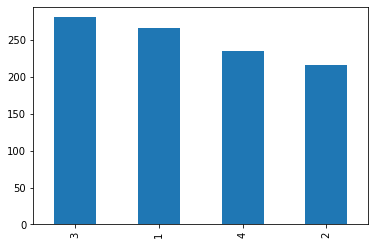

In [5]:
df['custcat'].value_counts().plot.bar ()


/home/rg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

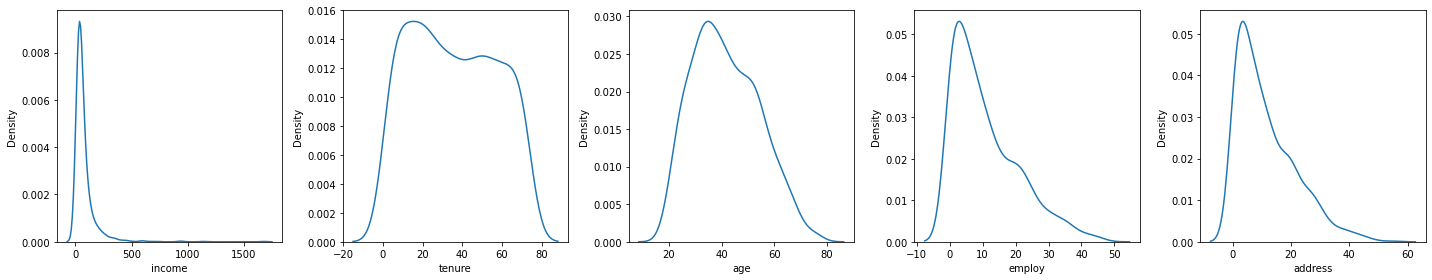

In [6]:
plt.figure (figsize = (20,4))
plt.subplot (1,5,1)
sns.distplot (df ['income'], hist = False)

plt.subplot (1,5,2)
sns.distplot (df ['tenure'], hist = False)

plt.subplot (1,5,3)
sns.distplot (df ['age'], hist = False)

plt.subplot (1,5,4)
sns.distplot (df ['employ'], hist = False)

plt.subplot (1,5,5)
sns.distplot (df ['address'], hist = False)

plt.tight_layout ()

/home/rg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rg/anaconda3/

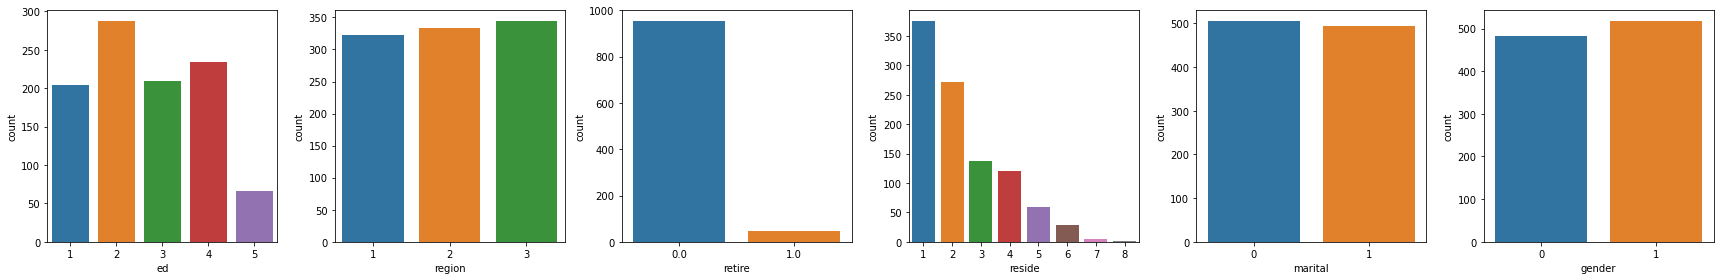

In [7]:
plt.figure (figsize = (24,4))

plt.subplot (1,6,1)
sns.countplot (df ['ed'])

plt.subplot (1,6,2)
sns.countplot (df ['region'])

plt.subplot (1,6,3)
sns.countplot (df ['retire'])

plt.subplot (1,6,4)
sns.countplot (df ['reside'])

plt.subplot (1,6,5)
sns.countplot (df ['marital'])

plt.subplot (1,6,6)
sns.countplot (df ['gender'])

plt.tight_layout ()


In [8]:
df.tail ()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [9]:
X1 = df[['tenure','age', 'address', 'income', 'employ', 'ed', 'retire']].values
X1[0:5]

array([[ 13.,  44.,   9.,  64.,   5.,   4.,   0.],
       [ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 68.,  52.,  24., 116.,  29.,   1.,   0.],
       [ 33.,  33.,  12.,  33.,   0.,   2.,   0.],
       [ 23.,  30.,   9.,  30.,   2.,   1.,   0.]])

In [10]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [11]:
pipe = Pipeline ([('Poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=True, order='F')), ('Scaler',StandardScaler())])
X = pipe.fit_transform (X1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 29) (800,)
Test set: (200, 29) (200,)


In [13]:


from sklearn.neighbors import KNeighborsClassifier



In [14]:
from sklearn import metrics
#Train Model and Predict  
Score = {}
for k in range (1,50):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
   
    Score.update ({k :  metrics.accuracy_score(y_test, neigh.predict (X_test))})


In [15]:
Score


{1: 0.34,
 2: 0.3,
 3: 0.355,
 4: 0.365,
 5: 0.355,
 6: 0.375,
 7: 0.34,
 8: 0.37,
 9: 0.38,
 10: 0.36,
 11: 0.37,
 12: 0.4,
 13: 0.405,
 14: 0.415,
 15: 0.395,
 16: 0.38,
 17: 0.415,
 18: 0.4,
 19: 0.415,
 20: 0.4,
 21: 0.37,
 22: 0.385,
 23: 0.365,
 24: 0.385,
 25: 0.4,
 26: 0.395,
 27: 0.42,
 28: 0.41,
 29: 0.43,
 30: 0.415,
 31: 0.43,
 32: 0.415,
 33: 0.41,
 34: 0.4,
 35: 0.42,
 36: 0.415,
 37: 0.41,
 38: 0.425,
 39: 0.42,
 40: 0.415,
 41: 0.435,
 42: 0.425,
 43: 0.415,
 44: 0.43,
 45: 0.42,
 46: 0.44,
 47: 0.455,
 48: 0.44,
 49: 0.43}

<AxesSubplot:>

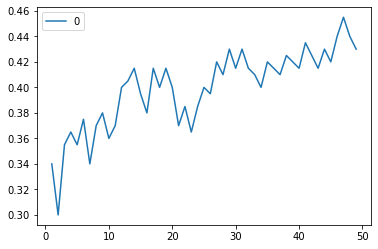

In [16]:
pd.DataFrame (Score, index = [0]).transpose ().plot ()

In [17]:
neigh = KNeighborsClassifier(n_neighbors = 47).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 4, 4, 4])

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print (confusion_matrix (yhat, y_test))

[[34  6 19 16]
 [ 1 16  4 13]
 [12 13 26  7]
 [ 4  9  5 15]]


In [20]:
print (classification_report (yhat, y_test))

              precision    recall  f1-score   support

           1       0.67      0.45      0.54        75
           2       0.36      0.47      0.41        34
           3       0.48      0.45      0.46        58
           4       0.29      0.45      0.36        33

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.44       200
weighted avg       0.50      0.46      0.47       200



In [21]:
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


array([0.34 , 0.3  , 0.355, 0.365, 0.355, 0.375, 0.34 , 0.37 , 0.38 ,
       0.36 , 0.37 , 0.4  , 0.405, 0.415, 0.395, 0.38 , 0.415, 0.4  ,
       0.415, 0.4  , 0.37 , 0.385, 0.365, 0.385, 0.4  , 0.395, 0.42 ,
       0.41 , 0.43 , 0.415, 0.43 , 0.415, 0.41 , 0.4  , 0.42 , 0.415,
       0.41 , 0.425, 0.42 ])

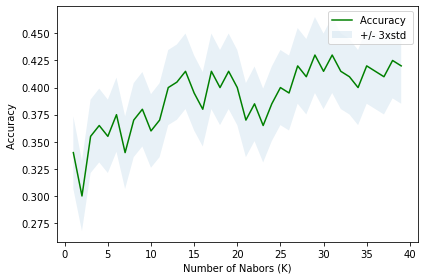

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.43 with k= 29
